# Testing area

In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.7" 2020-04-14 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.7+8-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.7+8-LTS, mixed mode)
  Starting server from /usr/local/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/0t/v201m3m93lv580kprr2glr3h0000gn/T/tmp1di74lnh
  JVM stdout: /var/folders/0t/v201m3m93lv580kprr2glr3h0000gn/T/tmp1di74lnh/h2o_esdras_started_from_python.out
  JVM stderr: /var/folders/0t/v201m3m93lv580kprr2glr3h0000gn/T/tmp1di74lnh/h2o_esdras_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Mexico_City
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_esdras_69hdnw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
df_train=pd.read_csv("solar_train.csv")

In [4]:
df_train.shape

(24514, 11)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

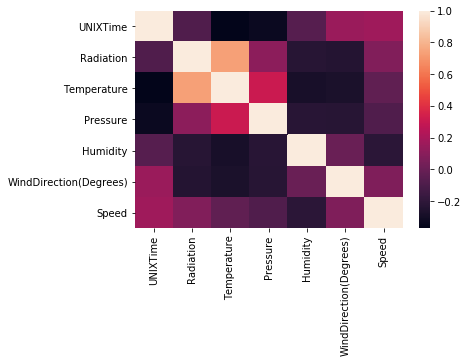

In [6]:
sns.heatmap(df_train.corr())

In [7]:
df_train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24514 entries, 0 to 24513
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24514 non-null  int64  
 1   Data                    24514 non-null  object 
 2   Time                    24514 non-null  object 
 3   Radiation               24514 non-null  float64
 4   Temperature             24514 non-null  int64  
 5   Pressure                24514 non-null  float64
 6   Humidity                24514 non-null  int64  
 7   WindDirection(Degrees)  24514 non-null  float64
 8   Speed                   24514 non-null  float64
 9   TimeSunRise             24514 non-null  object 
 10  TimeSunSet              24514 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.1+ MB


In [9]:
df_train.Data =  pd.to_datetime(df_train.Data)

In [10]:
#df_train.Time = pd.to_timedelta(df_train.Time, errors='coerce')

In [11]:
#df_train.TimeSunRise = pd.to_timedelta(df_train.TimeSunRise, errors='coerce')

In [12]:
#df_train.TimeSunSet = pd.to_timedelta(df_train.TimeSunSet, errors='coerce')

In [13]:
df_train.drop(columns =['Data','Time'], inplace = True)

# new testing

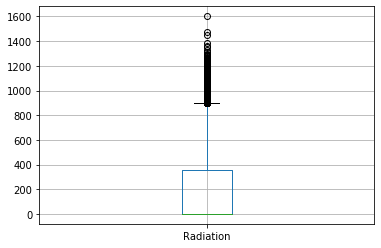

In [14]:
df_train.boxplot(column=['Radiation'])

# Radiation outliers

In [15]:
q1=np.percentile(df_train.Radiation, 25)
q3=np.percentile(df_train.Radiation, 75)

In [16]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [17]:
len(df_train[df_train.Radiation < lower])

0

In [18]:
train_outlers=df_train[df_train.Radiation < upper]
train_outlers.shape

(24511, 9)

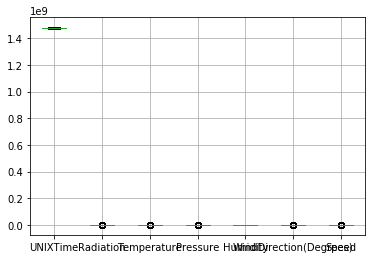

In [19]:
train_outlers.boxplot()

# speed outliers

In [20]:
q1=np.percentile(train_outlers.Speed, 25)
q3=np.percentile(train_outlers.Speed, 75)

In [21]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [22]:
len(train_outlers[train_outlers.Speed < lower])

0

In [23]:
train_speed=train_outlers[train_outlers.Speed < upper]
train_speed.shape

(24418, 9)

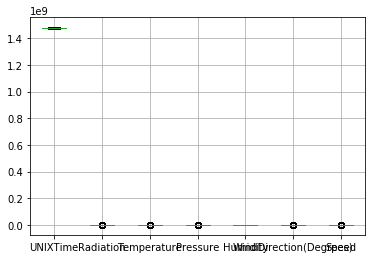

In [24]:
train_speed.boxplot()

# WindDirection(Degrees) outliers

In [25]:
q1=np.percentile(train_speed['WindDirection(Degrees)'], 25)
q3=np.percentile(train_speed['WindDirection(Degrees)'], 75)

In [26]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [27]:

len(train_speed[train_speed['WindDirection(Degrees)'] < lower])

0

In [28]:
train_wind=train_speed[train_speed['WindDirection(Degrees)'] < upper]
train_wind.shape

(24418, 9)

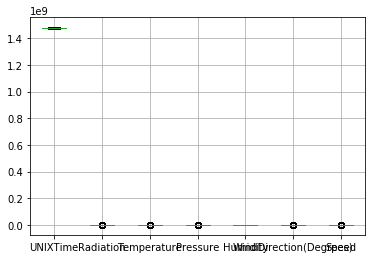

In [29]:
train_wind.boxplot()

# Temperature 

In [30]:
#q1=np.percentile(train_wind.Temperature, 25)
#q3=np.percentile(train_wind.Temperature, 75)

In [31]:
#iqr=q3-q1

#upper=q3+1*iqr
#lower=q3-2*iqr

In [32]:
#len(train_wind[train_wind.Temperature < lower])

In [33]:
#train_temperature=train_wind[train_wind.Temperature< upper]
#train_temperature.shape

In [34]:
#train_temperature.boxplot()

# H2O setup

In [35]:
#df_train.to_csv('solar_train_clean.csv')
#train_outlers.to_csv('solar_train_clean.csv')
#train_speed.to_csv('solar_train_clean.csv')
train_wind.to_csv('solar_train_clean.csv')
#train_temperature.to_csv('solar_train_clean.csv')

In [36]:
#df_train
#train_outlers
#train_speed
train_wind
#train_temperature

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00
...,...,...,...,...,...,...,...,...,...
24509,1481676309,216.29,50,30.28,96,304.22,12.37,06:48:00,17:45:00
24510,1473426025,1.47,44,30.37,100,162.80,3.37,06:09:00,18:31:00
24511,1474966519,1.20,48,30.42,64,158.90,4.50,06:12:00,18:15:00
24512,1475451021,659.12,56,30.42,99,55.72,13.50,06:14:00,18:10:00


In [37]:
df_test=pd.read_csv("solar_test.csv")

In [38]:
df_test.drop(columns =['Data','Time', 'id'], inplace = True)

In [39]:
#df_test.Data =  pd.to_datetime(df_test.Data)

In [40]:
df_test.to_csv('solar_test_clean.csv')

In [41]:
df_test

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1478720107,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1474063503,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,1476109221,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,1481475056,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,1477493117,45,30.40,34,175.89,6.75,06:21:00,17:52:00
...,...,...,...,...,...,...,...,...
8167,1477777520,51,30.42,101,336.56,5.62,06:23:00,17:50:00
8168,1481286949,45,30.36,70,204.75,4.50,06:46:00,17:44:00
8169,1476376223,49,30.46,43,155.70,12.37,06:17:00,18:01:00
8170,1480320620,47,30.47,39,156.22,12.37,06:38:00,17:42:00


In [42]:
# parsear datos a h2o
train=h2o.import_file('solar_train_clean.csv')
test=h2o.import_file('solar_test_clean.csv')


X=train.columns
y='Radiation'
X.remove(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
# factor para clasificacion binaria

#train[y]=train[y].asfactor()
#test[y]=test[y].asfactor()

In [44]:
# 10 modelos

aml=H2OAutoML(max_models=12, seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [45]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200504_151328,9081.81,95.2985,9081.81,51.6232,nan
StackedEnsemble_BestOfFamily_AutoML_20200504_151328,9504.5,97.4911,9504.5,53.8135,nan
XGBoost_3_AutoML_20200504_151328,10108.9,100.543,10108.9,57.8479,nan
GBM_1_AutoML_20200504_151328,10134.3,100.669,10134.3,56.2493,nan
GBM_2_AutoML_20200504_151328,10226,101.124,10226,56.175,nan
GBM_4_AutoML_20200504_151328,10377.4,101.869,10377.4,55.0601,nan
GBM_3_AutoML_20200504_151328,10463.7,102.292,10463.7,56.5025,nan
XGBoost_1_AutoML_20200504_151328,11450.5,107.007,11450.5,60.2055,nan
XGBoost_2_AutoML_20200504_151328,11597.2,107.691,11597.2,63.1954,nan
GBM_5_AutoML_20200504_151328,12197.5,110.442,12197.5,65.1641,nan


In [46]:
aml.leader  # mejor modelo

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200504_151328

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2252.616205750892
RMSE: 47.461734120772405
MAE: 27.031321246471688
RMSLE: NaN
R^2: 0.977435267909593
Mean Residual Deviance: 2252.616205750892
Null degrees of freedom: 24417
Residual degrees of freedom: 24411
Null deviance: 2437626216.506666
Residual deviance: 55004382.512025274
AIC: 257814.52036304423

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 9081.808252796787
RMSE: 95.29852177655636
MAE: 51.623244910719954
RMSLE: NaN
R^2: 0.9090264157748543
Mean Residual Deviance: 9081.808252796787
Null degrees of freedom: 24417
Residual degrees of freedom: 24411
Null deviance: 2438182965.9108367
Residual deviance: 221759593.91679195
AIC: 291857.63252702705


In [47]:
pred=aml.leader.predict(test)

pred

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
652.672
973.588
7.32639
10.8313
-1.02117
269.327
-41.5628
10.8763
699.246
150.288


In [48]:
test

C1,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1.47872e+09,59,30.47,44,312.67,3.37,1970-01-01 06:28:00,1970-01-01 17:45:00
1,1.47406e+09,59,30.48,83,38.01,6.75,1970-01-01 06:10:00,1970-01-01 18:25:00
2,1.47611e+09,47,30.39,78,213.62,5.62,1970-01-01 06:16:00,1970-01-01 18:03:00
3,1.48148e+09,45,30.4,98,176.63,4.5,1970-01-01 06:47:00,1970-01-01 17:44:00
4,1.47749e+09,45,30.4,34,175.89,6.75,1970-01-01 06:21:00,1970-01-01 17:52:00
5,1.47647e+09,60,30.46,37,5.2,3.37,1970-01-01 06:17:00,1970-01-01 18:00:00
6,1.48152e+09,49,30.39,101,342.02,2.25,1970-01-01 06:47:00,1970-01-01 17:44:00
7,1.47611e+09,48,30.39,81,197.23,10.12,1970-01-01 06:16:00,1970-01-01 18:03:00
8,1.47736e+09,57,30.42,77,10.33,12.37,1970-01-01 06:21:00,1970-01-01 17:53:00
9,1.48298e+09,48,30.34,98,89.03,5.62,1970-01-01 06:56:00,1970-01-01 17:52:00


In [49]:
pred_as_pandas = h2o.as_list(pred) # pandas data frame is the default

In [50]:
pred_as_pandas

,predict
0,652.671946
1,973.588226
2,7.326391
3,10.831343
4,-1.021166
...,...
8167,337.692724
8168,-13.047459
8169,-11.550148
8170,-9.524529


In [51]:
#pred_as_pandas['id'] = pred_as_pandas.index
pred_as_pandas.insert(0, 'id', pred_as_pandas.index)

In [52]:
pred_as_pandas

,id,predict
0,0,652.671946
1,1,973.588226
2,2,7.326391
3,3,10.831343
4,4,-1.021166
...,...,...
8167,8167,337.692724
8168,8168,-13.047459
8169,8169,-11.550148
8170,8170,-9.524529


In [53]:
pred_as_pandas.rename(columns={'predict': 'Radiation'}, inplace=True)

In [54]:
pred_as_pandas

,id,Radiation
0,0,652.671946
1,1,973.588226
2,2,7.326391
3,3,10.831343
4,4,-1.021166
...,...,...
8167,8167,337.692724
8168,8168,-13.047459
8169,8169,-11.550148
8170,8170,-9.524529


In [55]:
pred_as_pandas.to_csv('submission_1.csv')

In [56]:
kaggle=pd.read_csv("submission_1.csv")
kaggle.drop(columns =['Unnamed: 0'], inplace = True)


In [57]:
kaggle

,id,Radiation
0,0,652.671946
1,1,973.588226
2,2,7.326391
3,3,10.831343
4,4,-1.021166
...,...,...
8167,8167,337.692724
8168,8168,-13.047459
8169,8169,-11.550148
8170,8170,-9.524529


In [58]:
kaggle.to_csv('submission_1.csv')